In [ ]:
# Plots numerically the upper bound for the qubit depolarizing channel from Theorem 4.2 in https://arxiv.org/pdf/1701.03081.pdf
# Compare to Figure 3  

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import qutip as qt
import scipy.linalg as la
from scipy.optimize import NonlinearConstraint, Bounds, minimize

In [42]:
def entropy(p):
    e = 0
    for pi in p:
        if pi !=0:
            e =e-pi*np.log2(pi)
    return e


In [43]:
def coherent_information(rho_AB,dA,dB):
    rhoAB = qt.Qobj(rho_AB,dims=[[dA,dB],[dA,dB]])
    rhoB = rhoAB.ptrace([1]) #ptrace takes list of integers that mark the component systems that should be kept.
    eigs_B = la.eigvals(rhoB.full().data)
    eigs_AB = la.eigvals(rho_AB)
    return entropy(eigs_B)-entropy(eigs_AB)
    

In [44]:
def f(params):
    r1,r2,alpha,beta = params
    K1 = np.array([[r1*np.cos(alpha),0],[0,r2*np.cos(beta)]])
    K2 = np.array([[0,r2*np.sin(beta)],[r1*np.sin(alpha),0]])
    
    K1_ext = np.kron(np.eye(2),K1)
    K2_ext = np.kron(np.eye(2),K2)

    # Density matrix of the Bell state
    bell = np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])/2
    rho_AB=(2/(r1**2+r2**2))* (K1_ext@bell@np.conj(np.transpose((K1_ext)))+K2_ext@bell@np.conj(np.transpose((K2_ext))))
    return coherent_information(rho_AB,2,2)
    
    

In [45]:
def constraint(params):
    r1,r2,alpha,beta = params
    return (r1*np.cos(alpha)+r2*np.cos(beta))**2/(2*(r1**2+r2**2))

In [46]:
upper_bound = []
hashing = []
p_range = np.arange(0.01,0.25, 0.01)
eps = 1e-20
# variable bounds
bounds = Bounds([0,0,-np.inf,-np.inf],[1,1,np.inf,np.inf])
for p in p_range:
    # constraint
    con = NonlinearConstraint(constraint, 1-p-eps, 1-p+eps)
    
    # initial guess
    x0=[1,1,1,1]
    
    res = minimize(f, x0, method='trust-constr',constraints=[con], bounds=bounds)
    upper_bound.append(res.fun)
    hashing.append(1-entropy([1-p,p/3,p/3,p/3]))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

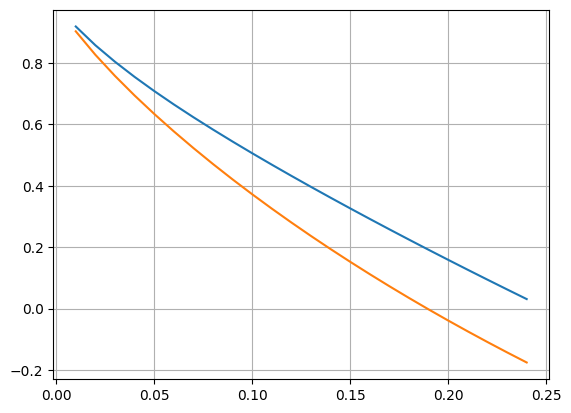

In [47]:
plt.figure()
plt.grid()
plt.plot(p_range,upper_bound)
plt.plot(p_range,hashing)